In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the cleaned and resampled dataset
data = pd.read_csv("balanced_data.csv")
print(f"Dataset shape: {data.shape}")
print(data.head())

Dataset shape: (61875, 89)
     feat_1  feat_2  feat_3    feat_4    feat_5    feat_6    feat_7    feat_8  \
0  0.017857     0.0     0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.000000     0.0     0.0  0.000000  0.000000  0.000000  0.000000  0.013158   
2  0.000000     0.0     0.0  0.000000  0.000000  0.000000  0.000000  0.013158   
3  0.017857     0.0     0.0  0.014286  0.315789  0.166667  0.131579  0.000000   
4  0.000000     0.0     0.0  0.000000  0.000000  0.000000  0.000000  0.000000   

   feat_9   feat_10  ...   feat_85   feat_86   feat_87  feat_88  feat_89  \
0     0.0  0.000000  ...  0.018182  0.000000  0.000000      0.0      0.0   
1     0.0  0.000000  ...  0.000000  0.000000  0.000000      0.0      0.0   
2     0.0  0.000000  ...  0.000000  0.000000  0.000000      0.0      0.0   
3     0.0  0.033333  ...  0.000000  0.016129  0.040816      0.0      0.0   
4     0.0  0.000000  ...  0.018182  0.000000  0.000000      0.0      0.0   

    feat_90  feat_91  feat_92

In [2]:
# Split into features (X) and labels (y)
X = data.drop(columns="target")
y = data["target"]

# Optional: Check unique class labels
print("Unique class labels:", sorted(y.unique()))

Unique class labels: [1, 2, 3, 4, 5, 6, 7, 8, 9]


In [3]:
# Stratified split to preserve class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (49500, 88)
Test size: (12375, 88)


In [4]:
clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=100,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

clf.fit(X_train, y_train)
print("Model trained.")

Model trained.


In [5]:
y_pred = clf.predict(X_test)

# Print accuracy
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Test Accuracy: 0.8579


In [6]:
# Optional: create label names like "Class 1", "Class 2", etc.
unique_labels = sorted(y.unique())
label_names = [f"Class {i}" for i in unique_labels]

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_names))

Classification Report:
              precision    recall  f1-score   support

     Class 1       0.87      0.90      0.89      1375
     Class 2       0.72      0.68      0.70      1375
     Class 3       0.68      0.67      0.67      1375
     Class 4       0.81      0.87      0.84      1375
     Class 5       0.98      0.99      0.99      1375
     Class 6       0.94      0.91      0.92      1375
     Class 7       0.89      0.89      0.89      1375
     Class 8       0.92      0.91      0.91      1375
     Class 9       0.91      0.91      0.91      1375

    accuracy                           0.86     12375
   macro avg       0.86      0.86      0.86     12375
weighted avg       0.86      0.86      0.86     12375



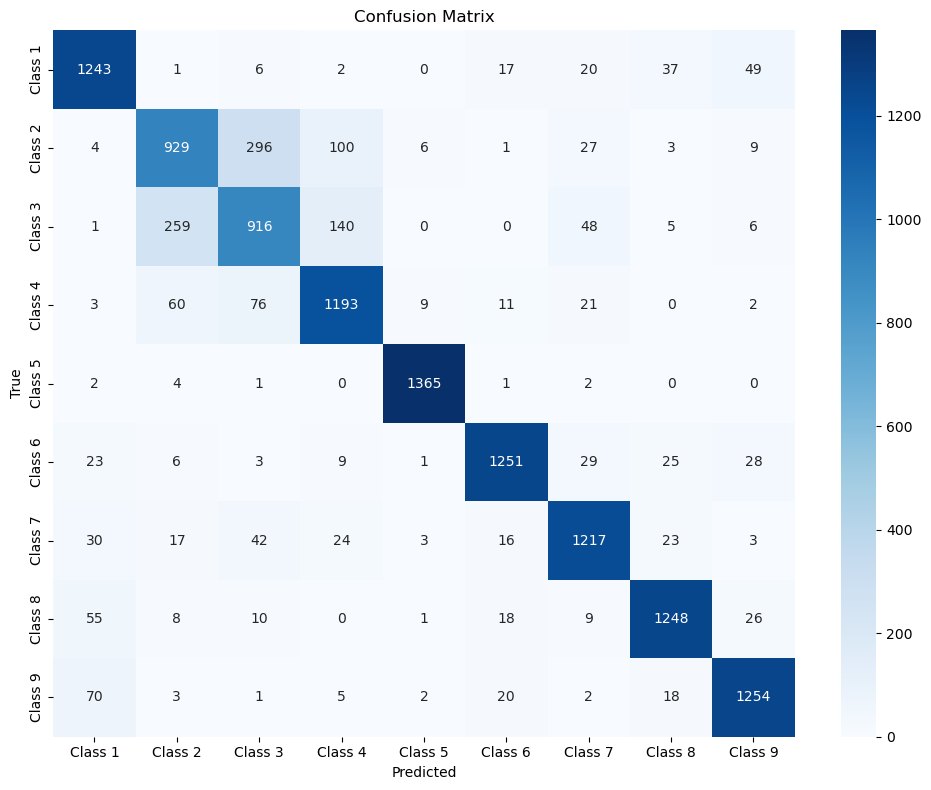

In [7]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_names,
            yticklabels=label_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

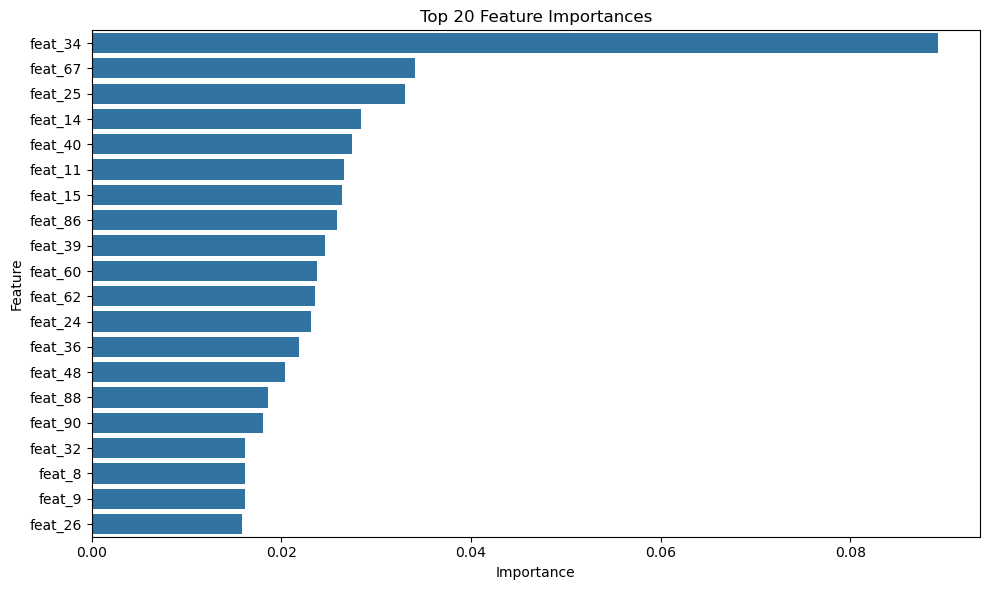

In [8]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1][:20]  # Top 20 features

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title("Top 20 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

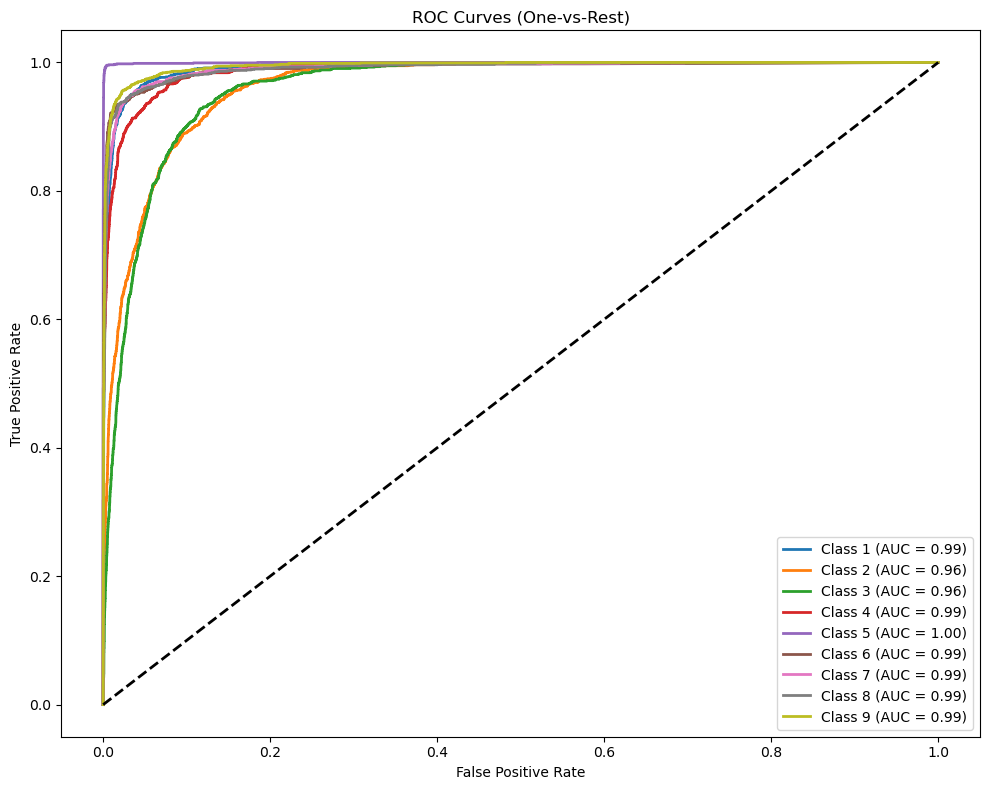

In [9]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

# Binarize target
y_test_bin = label_binarize(y_test, classes=unique_labels)
n_classes = y_test_bin.shape[1]

# Train OvR model
clf_ovr = OneVsRestClassifier(clf)
y_score = clf_ovr.fit(X_train, y_train).predict_proba(X_test)

# Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Class {i+1} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (One-vs-Rest)")
plt.legend()
plt.tight_layout()
plt.show()

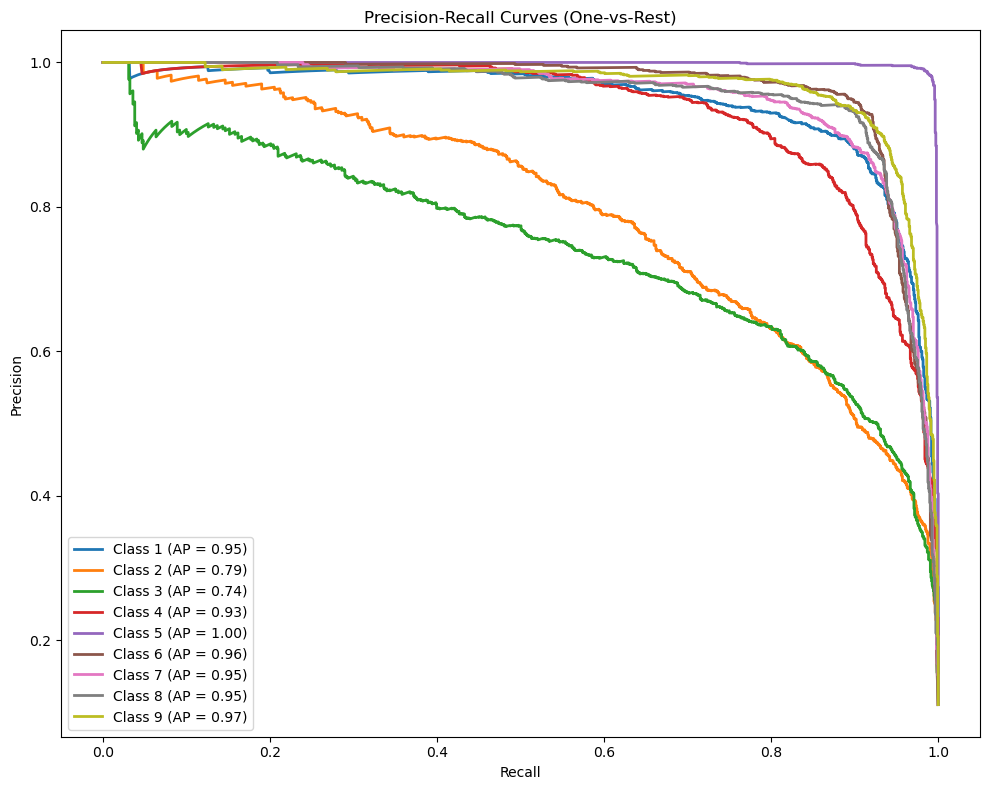

In [10]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    avg_precision = average_precision_score(y_test_bin[:, i], y_score[:, i])
    plt.plot(recall, precision, lw=2, label=f"Class {i+1} (AP = {avg_precision:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves (One-vs-Rest)")
plt.legend()
plt.tight_layout()
plt.show()

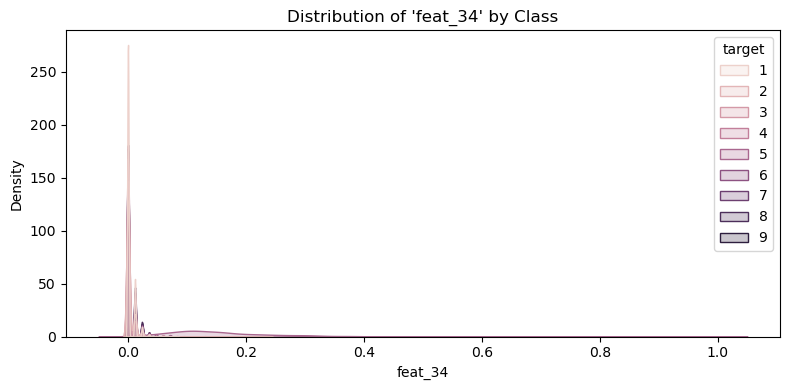

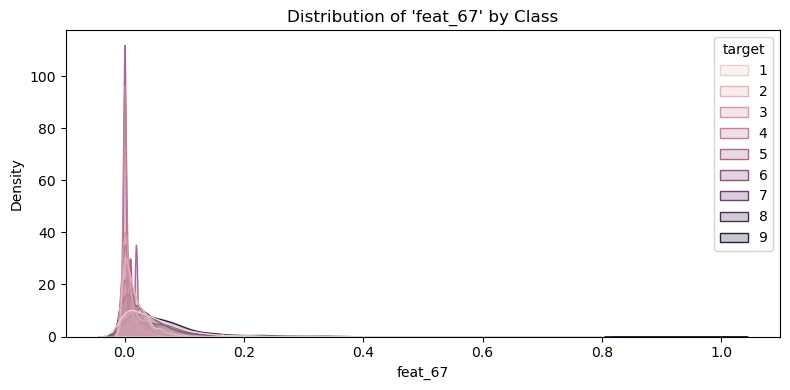

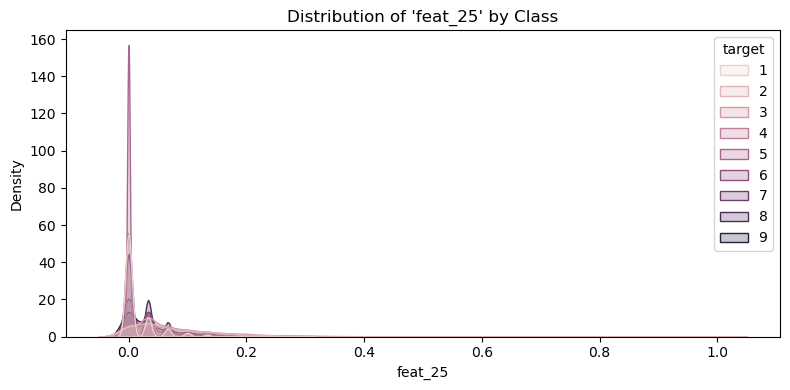

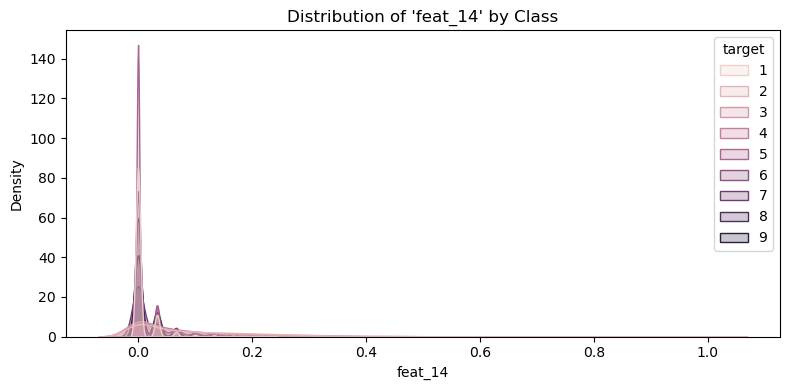

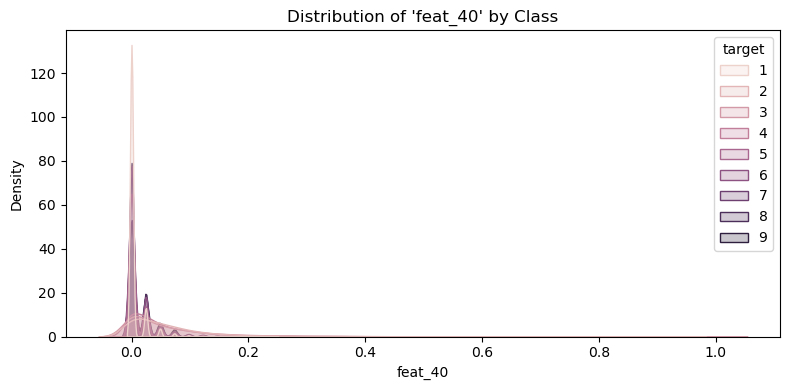

In [11]:
# Top N features
top_features = X.columns[indices[:5]]

for feature in top_features:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=data, x=feature, hue='target', common_norm=False, fill=True)
    plt.title(f"Distribution of '{feature}' by Class")
    plt.xlabel(feature)
    plt.tight_layout()
    plt.show()

/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


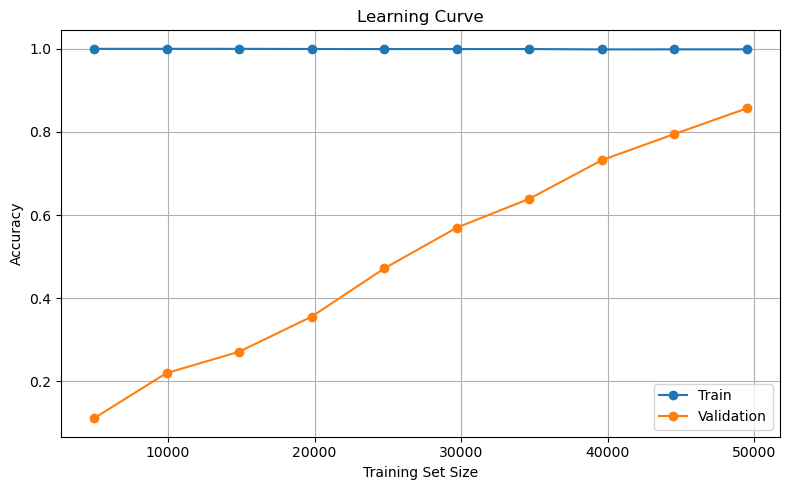

In [12]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    clf, X, y, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label="Train", marker='o')
plt.plot(train_sizes, test_mean, label="Validation", marker='o')
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()